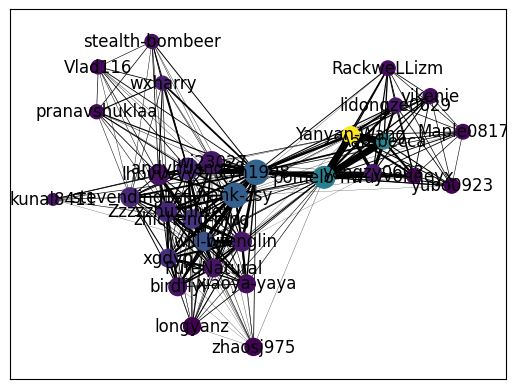

In [7]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# 读取数据
with open('data.json', 'r') as f:
    data = json.load(f)

# 提取节点和边数据
nodes = data['nodes']
edges = data['edges']

# 构建社交关系网络
G = nx.Graph()
for node in nodes:
    G.add_node(node[0], influence_score=node[1])
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

# 1. 社交网络构建与分析
# a. 使用字典表示法表示社交关系网络
network_dict = nx.to_dict_of_dicts(G)

# b. 找出每个用户的直接朋友
direct_friends = {node: list(G.neighbors(node)) for node in G.nodes()}

# 2. 统计与度中心性分析
# a. 计算每个用户的度数
degree = nx.degree(G)
sorted_degree = sorted(degree, key=lambda x: x[1], reverse=True)
top_5_degree = sorted_degree[:5]

# b. 找出影响力最高的前 5 个用户
influence_scores = {node: G.nodes[node]['influence_score'] for node in G.nodes()}
sorted_influence = sorted(influence_scores.items(), key=lambda x: x[1], reverse=True)
top_5_influence = sorted_influence[:5]

# c. 综合考虑影响力分数和朋友数量
combined_score = {node: 0.5 * G.nodes[node]['influence_score'] + 0.5 * degree[node] for node in G.nodes()}
sorted_combined = sorted(combined_score.items(), key=lambda x: x[1], reverse=True)
top_5_combined = sorted_combined[:5]

# 3. 推荐新朋友
# a. 对于用户 Yanyan-Wang，找出其“朋友的朋友”中最有可能成为新朋友的用户
yanyan_wang_friends = set(G.neighbors('Yanyan-Wang'))
potential_new_friends = set()
for friend in yanyan_wang_friends:
    friends_of_friend = set(G.neighbors(friend)) - yanyan_wang_friends
    potential_new_friends.update(friends_of_friend)
most_likely_new_friend = max(potential_new_friends, key=lambda x: len(set(G.neighbors(x)) & yanyan_wang_friends))
recommendation_reason = f"{most_likely_new_friend} 与 Yanyan-Wang 有最多共同的朋友"

# b. 找出与 Yanyan-Wang 连接强度最高的 5 个用户
connections_with_yanyan_wang = [(neighbor, G['Yanyan-Wang'][neighbor]['weight']) for neighbor in G.neighbors('Yanyan-Wang')]
sorted_connections = sorted(connections_with_yanyan_wang, key=lambda x: x[1], reverse=True)
top_5_connections = sorted_connections[:5]
recommended_connections = [neighbor for neighbor, _ in top_5_connections]

# 4. 网络图的可视化
# 绘制网络图
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=[degree[node] * 10 for node in G.nodes()], node_color=[G.nodes[node]['influence_score'] for node in G.nodes()])
nx.draw_networkx_edges(G, pos, width=[G[u][v]['weight'] / 5 for u, v in G.edges()])
nx.draw_networkx_labels(G, pos)
plt.show()

社交关系网络（字典表示法）： {'Yanyan-Wang': {'Aarebecca': {'weight': 25.3}, 'pomelo-nwu': {'weight': 25.09}, 'yangzy0603': {'weight': 11.85}, 'tyn1998': {'weight': 9.62}, 'yvonneyx': {'weight': 7.39}, 'lidongze0629': {'weight': 7.25}, 'RackweLLizm': {'weight': 4.5}, 'yikenie': {'weight': 4.25}, 'yubo0923': {'weight': 3.61}, 'Maple0817': {'weight': 3.11}, 'wj23027': {'weight': 2.34}, 'frank-zsy': {'weight': 2.1}, 'andyhuang18': {'weight': 1.14}, 'bifenglin': {'weight': 0.86}}, 'Aarebecca': {'Yanyan-Wang': {'weight': 25.3}, 'pomelo-nwu': {'weight': 24.84}, 'yangzy0603': {'weight': 11.92}, 'yvonneyx': {'weight': 7.73}, 'lidongze0629': {'weight': 6.58}, 'tyn1998': {'weight': 6.4}, 'RackweLLizm': {'weight': 4.84}, 'yikenie': {'weight': 4.55}, 'yubo0923': {'weight': 3.82}, 'Maple0817': {'weight': 3.27}, 'frank-zsy': {'weight': 0.97}}, 'pomelo-nwu': {'Yanyan-Wang': {'weight': 25.09}, 'Aarebecca': {'weight': 24.84}, 'yangzy0603': {'weight': 13.85}, 'tyn1998': {'weight': 12.48}, 'lidongze0629': {'weight': 8

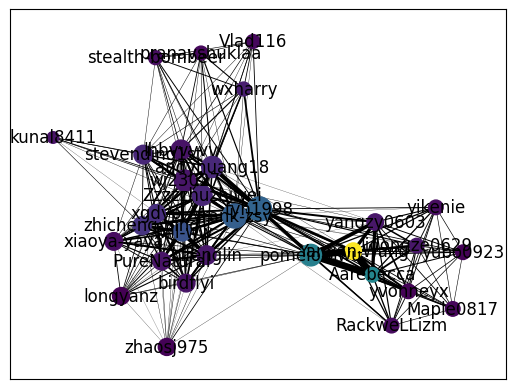

In [13]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# 读取数据
with open('data.json', 'r') as f:
    data = json.load(f)

# 提取节点和边数据
nodes = data['nodes']
edges = data['edges']

# 构建社交关系网络
G = nx.Graph()
for node in nodes:
    G.add_node(node[0], influence_score=node[1])
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

# 1. 社交网络构建与分析
# a. 使用字典表示法表示社交关系网络
network_dict = nx.to_dict_of_dicts(G)
print("社交关系网络（字典表示法）：", network_dict)

# b. 找出每个用户的直接朋友
direct_friends = {node: list(G.neighbors(node)) for node in G.nodes()}
print("每个用户的直接朋友：")
for user, friends in direct_friends.items():
    print(f"{user}: {friends}")

# 2. 统计与度中心性分析
# a. 计算每个用户的度数
degree = nx.degree(G)
sorted_degree = sorted(degree, key=lambda x: x[1], reverse=True)
top_5_degree = sorted_degree[:5]
print("度数最多的前5个用户及其朋友数量：")
for user, degree_count in top_5_degree:
    print(f"{user}: {degree_count}")

# b. 找出影响力最高的前5个用户
influence_scores = {node: G.nodes[node]['influence_score'] for node in G.nodes()}
sorted_influence = sorted(influence_scores.items(), key=lambda x: x[1], reverse=True)
top_5_influence = sorted_influence[:5]
print("影响力最高的前5个用户：")
for user, influence_score in top_5_influence:
    print(f"{user}: {influence_score}")

# c. 综合考虑影响力分数和朋友数量
combined_score = {node: 0.5 * G.nodes[node]['influence_score'] + 0.5 * degree[node] for node in G.nodes()}
sorted_combined = sorted(combined_score.items(), key=lambda x: x[1], reverse=True)
top_5_combined = sorted_combined[:5]
print("对社交网络最有影响力的用户（综合考虑影响力分数和朋友数量）：")
for user, combined_score_value in top_5_combined:
    print(f"{user}: {combined_score_value}")

# 3. 推荐新朋友
# a. 对于用户 Yanyan-Wang，找出其“朋友的朋友”中最有可能成为新朋友的用户
yanyan_wang_friends = set(G.neighbors('Yanyan-Wang'))
potential_new_friends = set()
for friend in yanyan_wang_friends:
    friends_of_friend = set(G.neighbors(friend)) - yanyan_wang_friends
    potential_new_friends.update(friends_of_friend)
most_likely_new_friend = max(potential_new_friends, key=lambda x: len(set(G.neighbors(x)) & yanyan_wang_friends))
recommendation_reason = f"{most_likely_new_friend} 与 Yanyan-Wang 有最多共同的朋友"
print("对于用户 Yanyan-Wang，其“朋友的朋友”中最有可能成为新朋友的用户及推荐理由：")
print(f"{most_likely_new_friend}: {recommendation_reason}")

# b. 找出与 Yanyan-Wang 连接强度最高的 5 个用户
connections_with_yanyan_wang = [(neighbor, G['Yanyan-Wang'][neighbor]['weight']) for neighbor in G.neighbors('Yanyan-Wang')]
sorted_connections = sorted(connections_with_yanyan_wang, key=lambda x: x[1], reverse=True)
top_5_connections = sorted_connections[:5]
recommended_connections = [neighbor for neighbor, _ in top_5_connections]
print("与 Yanyan-Wang 连接强度最高的 5 个用户（无论是否已经是直接朋友）及推荐排序：")
for i, connection in enumerate(top_5_connections, start=1):
    print(f"{i}. {connection[0]}: {connection[1]}")

# 4. 网络图的可视化
# 绘制网络图
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=[degree[node] * 10 for node in G.nodes()], node_color=[G.nodes[node]['influence_score'] for node in G.nodes()])
nx.draw_networkx_edges(G, pos, width=[G[u][v]['weight'] / 5 for u, v in G.edges()])
nx.draw_networkx_labels(G, pos)
plt.show()